In [15]:
%matplotlib inline
import matplotlib
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import sys
import time
sys.path.append('../../build')
import libry as lry

## Loading the environment:

In [19]:
K = lry.Config()
D = K.view()
K.clear()
K.addFile('human.g')

In [20]:
# reset joint state to zeros
def reset():
    global q
    q = np.zeros(K.getJointDimension())
    K.setJointState(q)

## task a) 1st task: Robot reaching towards y_target:

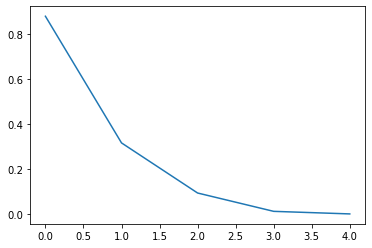

In [33]:
n = K.getJointDimension()
q = K.getJointState()
w = 1e-4
W = w * np.identity(n)  # W is equal the ID_n matrix times scalar w
    
input("initial posture, press Enter to continue...")

y_target = [-0.2, -0.4, 1.1]

def move_body(step = 5, alpha = 1, y_t=y_target):
    global q
    err_arr = []
    for i in range(step):
        # 1st task
        F = K.feature(lry.FS.position, ["|handR"])  # "handR" is the name of the right hand ("handL" for the left hand)
        y, J = F.eval(K)
        err_arr.append(np.linalg.norm(y_t - y))
        # compute joint updates
        q += alpha * inv(J.T @ J + W) @ J.T @ (y_t - y)
        # sets joint angles AND computes all frames AND updates display
        K.setJointState(q)
        # optional: pause and watch OpenGL
        # input("Press Enter to continue...")
        # time.sleep(0.5)
    return err_arr

reset()
err_a = move_body()
plt.plot(err_a)
plt.show()

    

## task b)

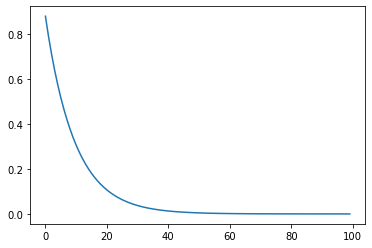

In [34]:
reset()
err_b = move_body(100, 0.1)
plt.plot(err_b)
plt.show()

## task c)

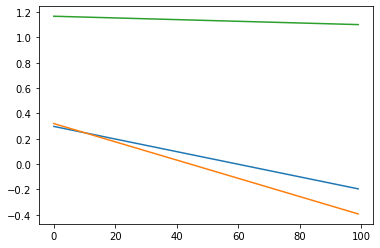

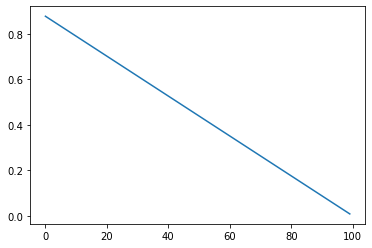

In [50]:
# interpolate in the task space
reset()
T = 100
y_target = [-0.2, -0.4, 1.1]
traj = []
err = []
F = K.feature(lry.FS.position, ["|handR"]) 
y_0, J = F.eval(K)

for t in range(T):
    traj.append(y_0 + (t/T)*(y_target - y_0))
    # print(traj[t])
    move_body(1,1,traj[t])
    y_curr, J = F.eval(K)
    err.append(np.linalg.norm(y_target - y_curr))
    # print(err)
    
plt.plot(traj)
plt.show()
plt.plot(err)
plt.show()

## task d)

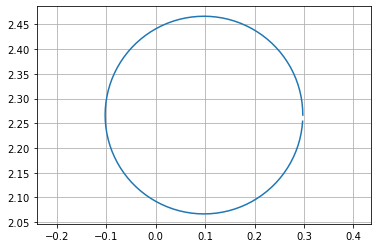

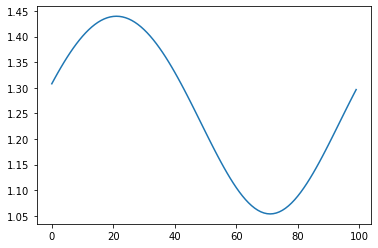

In [29]:
reset()
T = 100
circle_center = [-0.2, -0.4, 1.1] # [x,y,z]
traj = []
err = []
F = K.feature(lry.FS.position, ["|handR"])  # "handR" is the name of the right hand ("handL" for the left hand)
y_0, J = F.eval(K)

r = 0.2

def x_circle(s):
    return (r * np.cos(s * 2 * np.pi) + circle_center[0])

def z_circle(s):
    return (r * np.sin(s * 2 *np.pi) + circle_center[2])

for t in range(T):
    s = t/T
    traj.append(y_0 + [x_circle(s), circle_center[1], z_circle(s)])
    err.append(np.linalg.norm(y_target - traj[t]))
    

traj_np = np.array(traj)
    
plt.plot(traj_np[:,0], traj_np[:,-1])
plt.axis('equal')
plt.grid()
plt.show()
plt.plot(err)
plt.show()